In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from stabilogram.stato import Stabilogram
from descriptors import compute_all_features



In [3]:
forceplate_file_selected = "test.csv"

In [4]:
data_forceplatform = pd.read_csv(forceplate_file_selected,header=[31],sep=",",index_col=0)
data_forceplatform.head(25)

,MocapTime,DeviceFrame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz
MocapFrame,,,,,,,,,,,
0,0.00,0,1.622131,-8.233887,581.43750,-37.412109,-12.184570,3.460205,0.020956,-0.064344,0.0
1,0.01,1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.02,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.03,3,1.216919,-7.369629,582.31250,-38.582031,-12.597168,3.246948,0.021633,-0.066257,0.0
4,0.04,4,0.894653,-7.661621,582.31250,-38.800781,-12.507324,3.155640,0.021479,-0.066632,0.0
5,0.05,5,0.551392,-7.837646,582.50000,-39.134766,-12.436523,3.141968,0.021350,-0.067184,0.0
6,0.06,6,0.312332,-8.347656,583.25000,-39.474609,-12.345215,3.023804,0.021166,-0.067680,0.0
7,0.07,7,0.093540,-8.473145,583.87500,-39.812500,-12.234375,3.071289,0.020954,-0.068187,0.0
8,0.08,8,-0.203354,-8.983398,583.56250,-40.115234,-12.065430,3.013794,0.020675,-0.068742,0.0


In [7]:
dft = data_forceplatform
X = dft.get(" Cx")
#print(type(X))
#print(range(len(X)))
Y = dft.get(' Cy')
SwayLs=[]
for i in range(len(X)-1):
    Xdis=X[i+1]-X[i]
    Ydis=Y[i+1]-Y[i]
    SwayL=np.sqrt(Xdis**2+Ydis**2)*1000
    #print(SwayL)
    SwayLs=[SwayL,SwayLs] 
    SwayLs=pd.Series(SwayLs)
print(type(SwayLs))   
X = X - np.mean(X)
Y = Y - np.mean(Y)
X = 100*X
Y = 100*Y

X = X.to_numpy()[4000:7000]
Y= Y.to_numpy()[4000:7000]
SwayLs=SwayLs.to_numpy()[4000:7000]

<class 'pandas.core.series.Series'>


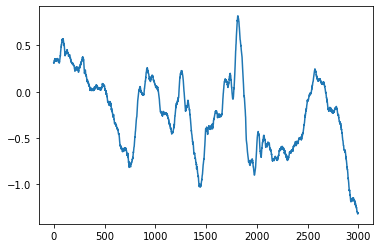

In [9]:
#plt.plot(X)
plt.plot(Y)
plt.plot(SwayLs)


In [9]:
data = np.array([X,Y]).T


In [10]:
valid_index = (np.sum(np.isnan(data),axis=1) == 0)
print(np.sum(valid_index),len(data))


3000 3000


In [11]:
stato = Stabilogram()
stato.from_array(array=data, original_frequency=100)

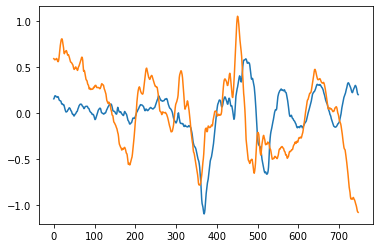

In [12]:
plt.plot(stato.medio_lateral)
plt.plot(stato.antero_posterior)

In [13]:
sway_density_radius = 0.3 # 3 mm

params_dic = {"sway_density_radius": sway_density_radius}

features = compute_all_features(stato, params_dic=params_dic)


In [14]:
features

{'mean_value_ML': -0.374230059297233,
 'mean_value_AP': -0.23879114400298684,
 'mean_distance_ML': 0.17958040138452508,
 'mean_distance_AP': 0.34804358300282173,
 'mean_distance_Radius': 0.42543251390428355,
 'maximal_distance_ML': 1.0934040941319192,
 'maximal_distance_AP': 1.0760904530397652,
 'maximal_distance_Radius': 1.1715541066635942,
 'rms_ML': 0.2654097291182826,
 'rms_AP': 0.4164848260024837,
 'rms_Radius': 0.49386428763472995,
 'range_ML': 1.6807728227876786,
 'range_AP': 2.125657571736097,
 'range_ML_AND_AP': 2.127236088553941,
 'range_ratio_ML_AND_AP': 0.7907072357919503,
 'planar_deviation_ML_AND_AP': 0.49386428763472995,
 'coefficient_sway_direction_ML_AND_AP': 0.23295078713826145,
 'confidence_ellipse_area_ML_AND_AP': 2.0369977219076536,
 'principal_sway_direction_ML_AND_AP': 13.280858617257454,
 'mean_velocity_ML': 0.3581935448408994,
 'mean_velocity_AP': 0.5203819156827688,
 'mean_velocity_ML_AND_AP': 0.6953583666729652,
 'sway_area_per_second_ML_AND_AP': 0.0958698490